In [4]:
import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import os

In [2]:
keywords_list = ['Quantum Technology', 'technological application', 'quantum system', 'quantum computer', 'quantum communication', 'Quantum application', 'quantum bit', 'Quantum sensing', 'quantum radar', 'quantum physics', 'Sciences', 'a compute unit', 'a quantum computer increase', 'electronic warfare capability', 'NAS', 'the Defense Science Board', 'nuclear material', 'military', 'encode information', 'military personnel', 'military sensing', 'Military Applications', 'Defense Primer', 'enhanced military capability', 'the National Academy', 'potential military application', 'sea-base nuclear deterrent']
query = 'Quantentechnologie'

In [5]:
tf_model = hub.load(os.getcwd()+ '/../../models/USE_model')

In [7]:
def get_modified_vectors(vec_data):
    
    new_data = []
    for val in vec_data:
        new_data.append(val)
    
    new_data = np.array(new_data).reshape(-1, 512)
    return new_data

def get_cosine_sim(vec_1, vec_2):
    
    return cosine_similarity(vec_1.reshape(1, -1), vec_2.reshape(1, -1))[0][0]

In [8]:
df = pd.DataFrame(keywords_list, columns=['keywords'])
df.sample(2)

,keywords
20,military sensing
6,quantum bit


In [9]:
query_vec = tf_model(query)['outputs'].numpy()[0].reshape(1, -1)

In [10]:
df['keyword_vec'] = df.apply(lambda x:tf_model(x['keywords'])['outputs'].numpy()[0].reshape(1, -1), axis=1)
df['sim'] = df.apply(lambda x:get_cosine_sim(x['keyword_vec'], query_vec), axis=1)

In [17]:
df

,keywords,keyword_vec,sim
0,Quantum Technology,"[[-0.07843952, 0.054803964, 0.0028398666, -0.0...",0.812254
1,technological application,"[[-0.034145337, 0.07561023, 0.02808445, 0.0090...",0.576806
2,quantum system,"[[-0.011369725, -0.0029329406, 0.0061733443, -...",0.543468
3,quantum computer,"[[-0.013426571, -0.023783872, -0.018854404, -0...",0.530896
4,quantum communication,"[[-0.09681769, 0.017721318, -0.014489609, 0.01...",0.520388
5,Quantum application,"[[-0.032896187, 0.05245216, 0.0048448294, 0.02...",0.500975
6,quantum bit,"[[-0.041787297, -0.06263489, 0.010755033, -0.0...",0.493008
7,Quantum sensing,"[[-0.027116165, -0.009281477, 0.023528038, 0.0...",0.490860
8,quantum radar,"[[-0.03031327, 0.029639818, 0.034956638, 0.004...",0.471275
9,quantum physics,"[[-0.042057022, 0.018567365, 0.0010471853, -0....",0.461624


<AxesSubplot:>

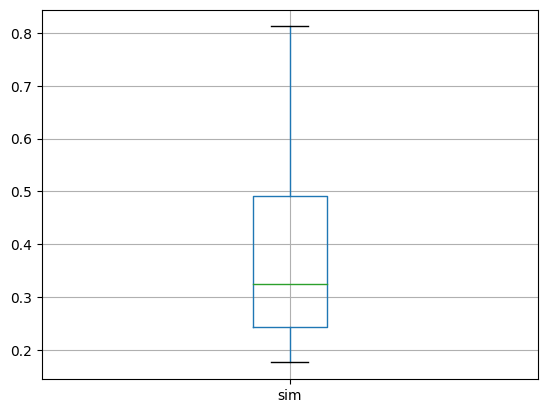

In [26]:
df.boxplot(column=['sim'], showfliers=False)

In [25]:
sim_values = df.sim.values
for val in range(25, 101, 25):
    print(round(np.percentile(sim_values, val), 3))

0.242
0.324
0.492
0.812


<AxesSubplot:>

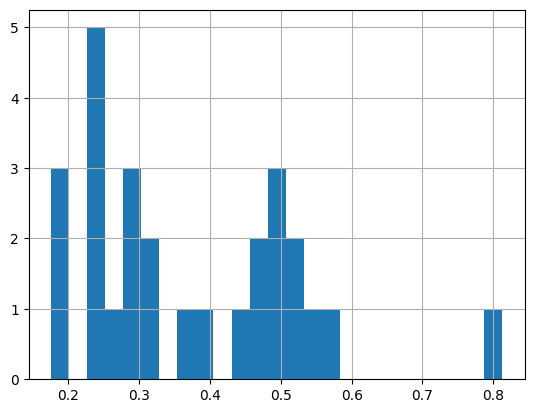

In [16]:
df.sim.hist(bins=25)